## Madina Hayva Putri - 5220411187
## Pemrosesan Teks Kelas B

## Tema: Perbandingan Aplikasi Edit Video di PlayStore

### Scraping Data dari 4 aplikasi

In [14]:
!pip install google-play-scraper

In [15]:
from google_play_scraper import Sort, reviews
from google_play_scraper import app
import pandas as pd
import numpy as np

### 1. Capcut

In [16]:
result, continuation_token = reviews(
    'com.lemon.lvoverseas',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=4000,
    filter_score_with=None
)
data1 = pd.DataFrame(np.array(result), columns=['review'])
data1 = data1.join(pd.DataFrame(data1.pop('review').tolist()))
data1.head()

reviewId         userName  \
0  9cdfa7f0-1739-47f0-95b3-9a2def399997  Pengguna Google   
1  d23420db-dc8a-40e7-b0f5-ce1e6a762297  Pengguna Google   
2  96a8bfda-cc4a-46ec-a108-533f490abaa3  Pengguna Google   
3  54e2319d-5b90-4431-a5a4-bf3740728b25  Pengguna Google   
4  5948deb2-a90a-4707-bc6b-0ad7986854b5  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  Sudah capek2 edit video2 dan foto2, ternyata n...      2            234   
1  capcut semakin update+ penambahan fitur semaki...      2            140   
2  Bagus bet aplikasinya, apalagi buat ngedit fot...      5           6670   
3  aplikasi baru di update, penggunaan hanya kada...      1           1123   
4  Dulu gw selalu ngonten pakai apk ini. tapi sem...      1             91   

  reviewCreatedVersion                  at  \
0               16.2.0 2025-12-25 09:14:22   
1               16.0.0 2025-12-25 14:45:58   
2               16.0.0 2025-12-16 06:46:13   
3               16.0.0 2025-12-26 17:20:25   
4               16.0.0 2025-12-26 05:19:36   

                                        replyContent           repliedAt  \
0                                               None                 NaT   
1  Thanks for your feedback. App crashes/closures... 2025-12-26 07:18:11   
2                                               None                 NaT   
3                                               None                 NaT   
4                                               None                 NaT   

  appVersion  
0     16.2.0  
1     16.0.0  
2     16.0.0  
3     16.0.0  
4     16.0.0

In [17]:
data1_baru = data1[['userName', 'content', 'score']]
data1 = data1_baru.rename(columns={'userName':'Nama Akun', 'content':'ulasan', 'score':'rating'})
data1.head()

Nama Akun                                             ulasan  rating
0  Pengguna Google  Sudah capek2 edit video2 dan foto2, ternyata n...       2
1  Pengguna Google  capcut semakin update+ penambahan fitur semaki...       2
2  Pengguna Google  Bagus bet aplikasinya, apalagi buat ngedit fot...       5
3  Pengguna Google  aplikasi baru di update, penggunaan hanya kada...       1
4  Pengguna Google  Dulu gw selalu ngonten pakai apk ini. tapi sem...       1

In [18]:
data1['rating'].value_counts()

rating
1    2186
5     528
2     527
3     447
4     312
Name: count, dtype: int64

### preprocessing data

In [19]:
!pip install emoji
!pip install nltk
!pip install Sastrawi

In [20]:
import re
import string
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [68]:
df1 = pd.DataFrame(data1)

In [69]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [225]:
stop_words = set(stopwords.words('indonesian'))

# stopwords tambahan
custom_stopwords = [
    # sapaan & basa-basi
    'halo', 'hai', 'hi', 'hello', 'gan', 'bro', 'sis', 'min', 'admin',

    # kata umum tidak bermakna sentimen
    'tolong', 'mohon', 'terima', 'kasih', 'thanks', 'makasih',
    'dong', 'nih', 'sih', 'deh', 'aja', 'kok', 'lah', 'yah', 'ya',
    'terimakasih', 'kali', 'ko', 'cuma', 'cuman', 'semoga', 'silahkan',
    'moga', 'pokok', 'kasi',

    # konteks aplikasi
    'aplikasi', 'app', 'apk', 'capcut', 'inshot', 'vn', 'kinemaster',
    'kine', 'master', 'editan', 'editnya', 'edit', 'video', 'aplikasinya',
    'aplikasih', 'vidio', 'editing', 'editor', 'videonya', 'videoin'

    # kata umum berfrekuensi tinggi
    'yang', 'dan', 'atau', 'untuk', 'dengan', 'pada', 'dari',
    'ini', 'itu', 'jadi', 'kalo', 'kalau', 'paling', 'lagi', 'kayak',
    'terus', 'trus', 'drpd', 'kayak', 'kaya', 'gini', 'gin', 'meng'
]

stop_words.update(custom_stopwords)

In [171]:
slang_dict = {
    'gk': 'tidak',
    'ga': 'tidak',
    'nggak': 'tidak',
    'ngga' : 'tidak',
    'tdk' : 'tidak',
    'bgt': 'banget',
    'dr': 'dari',
    'krn': 'karena',
    'karna': 'karena',
    'tp': 'tapi',
    'aja': 'saja',
    'eror': 'error',
    'erorr': 'error',
    'erorrs': 'error',
    'nontonya': 'nonton',
    'nntn' : 'nonton',
    'loginya': 'login',
    'ngedit' : 'edit',
    'udah' : 'sudah',
    'sudh' : 'sudah',
    'kalo' : 'kalau',
    'baguss' : 'bagus',
    'bagusss' : 'bagus',
    'bagu' : 'bagus',
    'bagussss': 'bagus',
    'ngebug' : 'bug',
    'ngelag' : 'lag',
    'skrg' : 'sekarang',
    'skarang' : 'sekarang',
    'gabisa' : 'tidak bisa',
    'bikin' : 'membuat',
    'pake' : 'pakai',
    'kodek' : 'kode'
}

In [226]:
def text_preprocessing(text, stop_words, slang_dict, stemmer):
    # 1. Casefolding
    text = text.lower()

    # 2. Hapus whitespace berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    # 3. Hapus karakter non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')

    # 4. Hapus angka, tanda baca, simbol, dan karakter non-huruf
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # 5. Tokenisasi
    tokens = word_tokenize(text)

    # 6. Normalisasi huruf berulang (asikkk → asik)
    tokens = [re.sub(r'(.)\1{2,}', r'\1\1', word) for word in tokens]

    # 7. Normalisasi kata gaul / typo
    tokens = [slang_dict.get(word, word) for word in tokens]

    # 8. Hapus stopword
    tokens = [word for word in tokens if word not in stop_words]

    # 9. Hapus kata dengan panjang ≤ 3 huruf
    tokens = [word for word in tokens if len(word) > 3]

    # 10. Stemming (Bahasa Indonesia)
    protected_words = {'bagus'}
    tokens = [w if w in protected_words else stemmer.stem(w) for w in tokens]

    # 11. Kembalikan ke bentuk string
    return ' '.join(tokens)

In [173]:
df1["Clean_Comment"] = df1["ulasan"].apply(lambda x: text_preprocessing(x, stop_words, slang_dict, stemmer))
df1.head()

Nama Akun                                             ulasan  rating  \
0  Pengguna Google  Sudah capek2 edit video2 dan foto2, ternyata n...       2   
1  Pengguna Google  capcut semakin update+ penambahan fitur semaki...       2   
2  Pengguna Google  Bagus bet aplikasinya, apalagi buat ngedit fot...       5   
3  Pengguna Google  aplikasi baru di update, penggunaan hanya kada...       1   
4  Pengguna Google  Dulu gw selalu ngonten pakai apk ini. tapi sem...       1   

                                       Clean_Comment sentiment_rating  \
0  capek foto ekspor ekspor tulis coba gratis kli...         Negative   
1  update tambah fitur gajelas lot suka macet kre...         Negative   
2  bagus foto hehee ekspor kdng iklan iklan ulang...         Positive   
3  update guna kadang kadang bayar simpan beaar s...         Negative   
4  ngonten pakai semenjak update iklan fiturnya p...         Negative   

  sentiment_lexicon  
0          Negative  
1          Positive  
2          Positive  
3           Neutral  
4          Negative

In [97]:
#cek data kosong
df1.isnull().sum()

Nama Akun            0
ulasan               0
rating               0
Clean_Comment        0
sentiment_rating     0
sentiment_lexicon    0
dtype: int64

In [77]:
#cek data yang sama
df1.duplicated().any()

np.False_

### pelabelan data

In [78]:
def sentiment_from_rating(r):
    if r >= 4:
        return 'Positive'
    elif r == 3:
        return 'Neutral'
    else:
        return 'Negative'

df1['sentiment_rating'] = df1['rating'].apply(sentiment_from_rating)

In [98]:
positive_words = [
    'bagus','mantap','keren','puas','suka','cepat','mudah',
    'oke','recommended','terbaik','bermanfaat', 'rekomendasi',
    'lancar', 'mudah', 'enak', 'guna', 'paham', 'gampang',
    'mampu', 'ngebantu', 'kebantu', 'best', 'cocok', 'ngerti'
]

negative_words = [
    'jelek','buruk','lemot','error','crash','parah','kecewa',
    'lambat','gagal','sampah','ribet','tolol','bangsat', 'ngelag',
    'ngebug', 'lag', 'bug', 'payah', 'gagal', 'rugi', 'busuk',
    'loading', 'stuck', 'sebal', 'susahin', 'nyebelin', 'bingung',
    'block', 'limit', 'premium', 'bayar', 'langganan', 'langgan'
]

In [99]:
def sentiment_lexicon(text):
    pos, neg = 0, 0
    for word in text.split():
        if word in positive_words:
            pos += 1
        elif word in negative_words:
            neg += 1

    if pos > neg:
        return 'Positive'
    elif neg > pos:
        return 'Negative'
    else:
        return 'Neutral'
df1['sentiment_lexicon'] = df1['Clean_Comment'].apply(sentiment_lexicon)

In [100]:
print("Jumlah data awal :", len(df1))

# Validasi: rating == lexicon
df1_valid = df1[df1['sentiment_rating'] == df1['sentiment_lexicon']].copy()
df1_invalid = df1[df1['sentiment_rating'] != df1['sentiment_lexicon']].copy()
print("Jumlah data setelah validasi :", len(df1_valid))
print("Jumlah data tidak valid (dihapus) :", len(df1_invalid))

Jumlah data awal : 4000
Jumlah data setelah validasi : 1919
Jumlah data tidak valid (dihapus) : 2081


In [101]:
df1_valid['app_name'] = 'CapCut'

## Distribusi Data

In [83]:
rating_counts = df1['sentiment_rating'].value_counts()
lexicon_counts = df1['sentiment_lexicon'].value_counts()

comparison_df = pd.DataFrame({
    'Rating-Based': rating_counts,
    'Lexicon-Based': lexicon_counts
}).fillna(0)

comparison_df = comparison_df.reindex(['Positive', 'Neutral', 'Negative'])

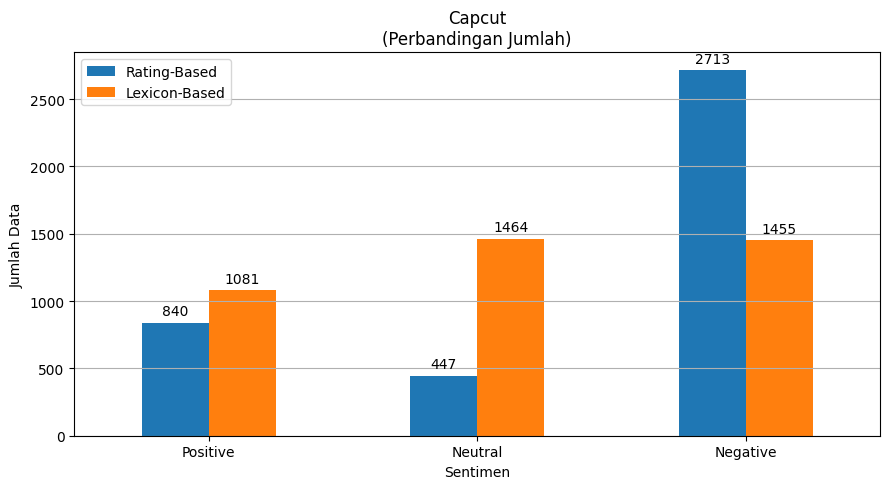

In [84]:
ax = comparison_df.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title('Capcut\n(Perbandingan Jumlah)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

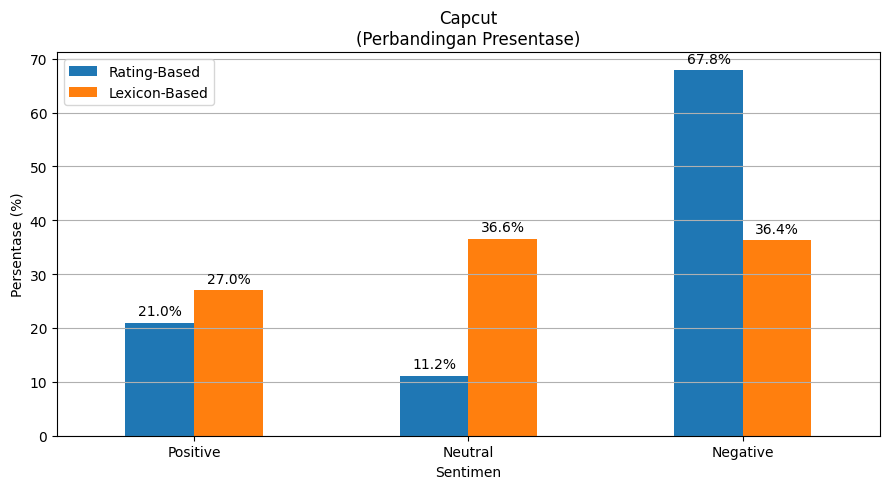

In [85]:
percentage_df = comparison_df.div(comparison_df.sum(axis=0), axis=1) * 100

ax = percentage_df.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title('Capcut\n(Perbandingan Presentase)')
plt.xlabel('Sentimen')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

In [86]:
df1.head()

Nama Akun                                             ulasan  rating  \
0  Pengguna Google  Sudah capek2 edit video2 dan foto2, ternyata n...       2   
1  Pengguna Google  capcut semakin update+ penambahan fitur semaki...       2   
2  Pengguna Google  Bagus bet aplikasinya, apalagi buat ngedit fot...       5   
3  Pengguna Google  aplikasi baru di update, penggunaan hanya kada...       1   
4  Pengguna Google  Dulu gw selalu ngonten pakai apk ini. tapi sem...       1   

                                       Clean_Comment sentiment_rating  \
0  capek foto ekspor ekspor tulis coba gratis kli...         Negative   
1  update tambah fitur gajelas lot suka macet kre...         Negative   
2  bagus aplikasi foto vidio hehee ekspor kdng ik...         Positive   
3  update guna kadang kadang bayar simpan beaar s...         Negative   
4  ngonten pakai semenjak update iklan fiturnya p...         Negative   

  sentiment_lexicon  
0          Negative  
1          Positive  
2          Positive  
3           Neutral  
4          Negative

In [ ]:
# Simpan hasil preprocessing
# df.to_csv('hasilAkhir_capcut.csv', index=False, encoding="utf-8-sig")

### Visualisasi N-Gram dan WordCloud

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.cm as cm
import seaborn as sns

In [174]:
def plot_ngram(df, sentiment, n, text_col,
               app_name="CapCut", top_n=10):

    texts = df[df["sentiment_rating"] == sentiment][text_col]
    if texts.empty:
        print(f"Tidak ada data untuk {sentiment}")
        return

    vec = CountVectorizer(ngram_range=(n, n), min_df=2)
    X = vec.fit_transform(texts)

    df_ngram = (
        pd.DataFrame({
            "Ngram": vec.get_feature_names_out(),
            "Frekuensi": X.sum(axis=0).A1
        })
        .sort_values("Frekuensi", ascending=False)
        .head(top_n)
    )

    palette = {
        "Positive": "Greens_r",
        "Neutral": "Blues_r",
        "Negative": "Reds_r"
    }

    ax = sns.barplot(
        data=df_ngram,
        x="Frekuensi", y="Ngram",
        hue="Ngram",
        palette=palette.get(sentiment, "viridis"),
        legend=False
    )

    ngram_name = "Bi-gram" if n == 2 else "Tri-gram"
    ax.set_title(f"{app_name}\n{ngram_name} Sentimen {sentiment}")
    ax.set_xlabel("Frekuensi")
    ax.set_ylabel("")

    for p in ax.patches:
        ax.text(
            p.get_width() + 0.3,
            p.get_y() + p.get_height()/2,
            int(p.get_width()),
            va="center",
            fontsize=9
        )

    plt.tight_layout()
    plt.show()

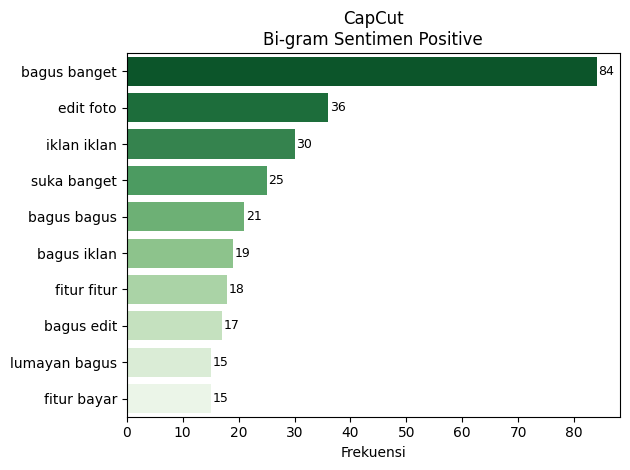

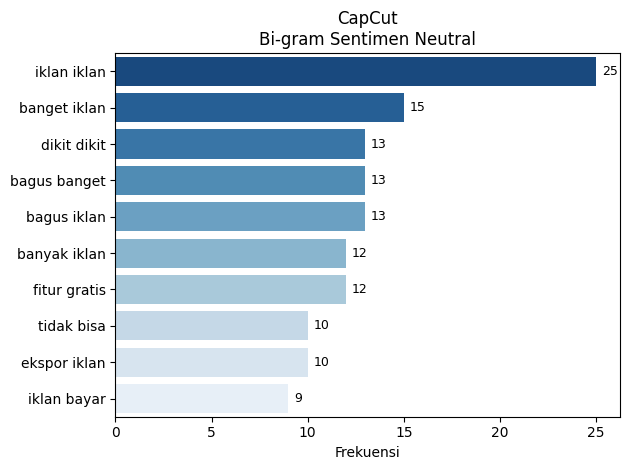

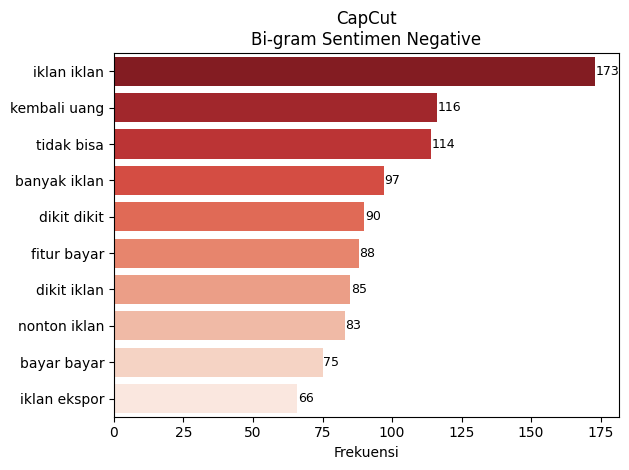

In [175]:
# Bi-gram
for sent in ['Positive', 'Neutral', 'Negative']:
    plot_ngram(
        df=df1,
        sentiment=sent,
        text_col='Clean_Comment',
        n=2,
        top_n=10,
        app_name="CapCut"
    )

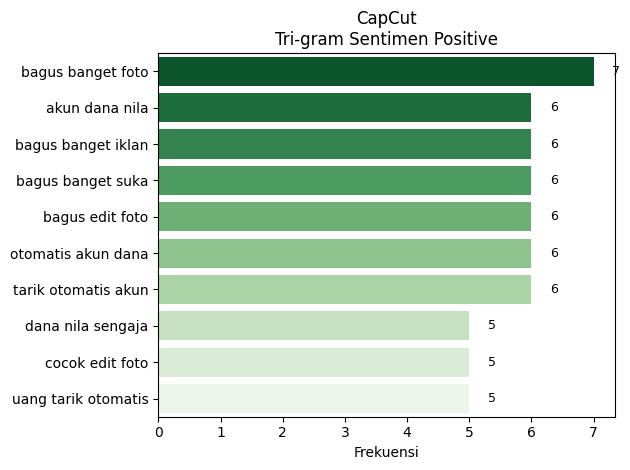

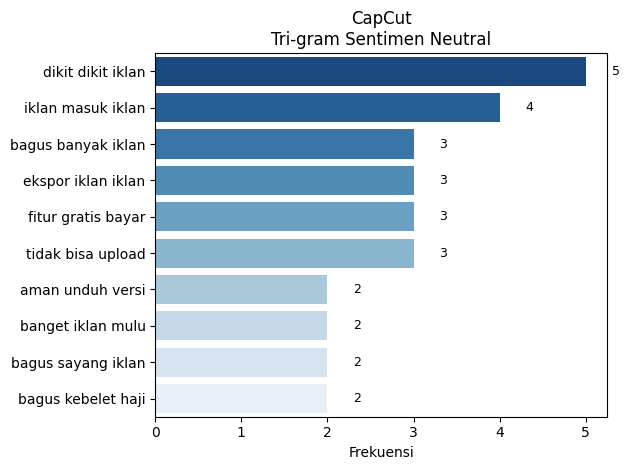

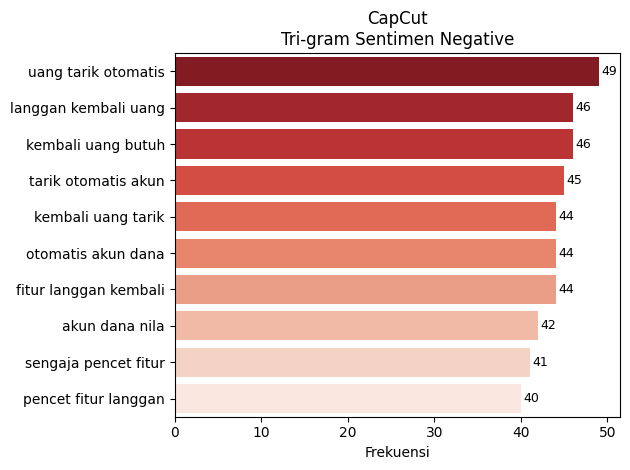

In [176]:
# Tri-gram
for sent in ['Positive', 'Neutral', 'Negative']:
    plot_ngram(
        df=df1,
        sentiment=sent,
        text_col='Clean_Comment',
        n=3,
        top_n=10,
        app_name="CapCut"
    )

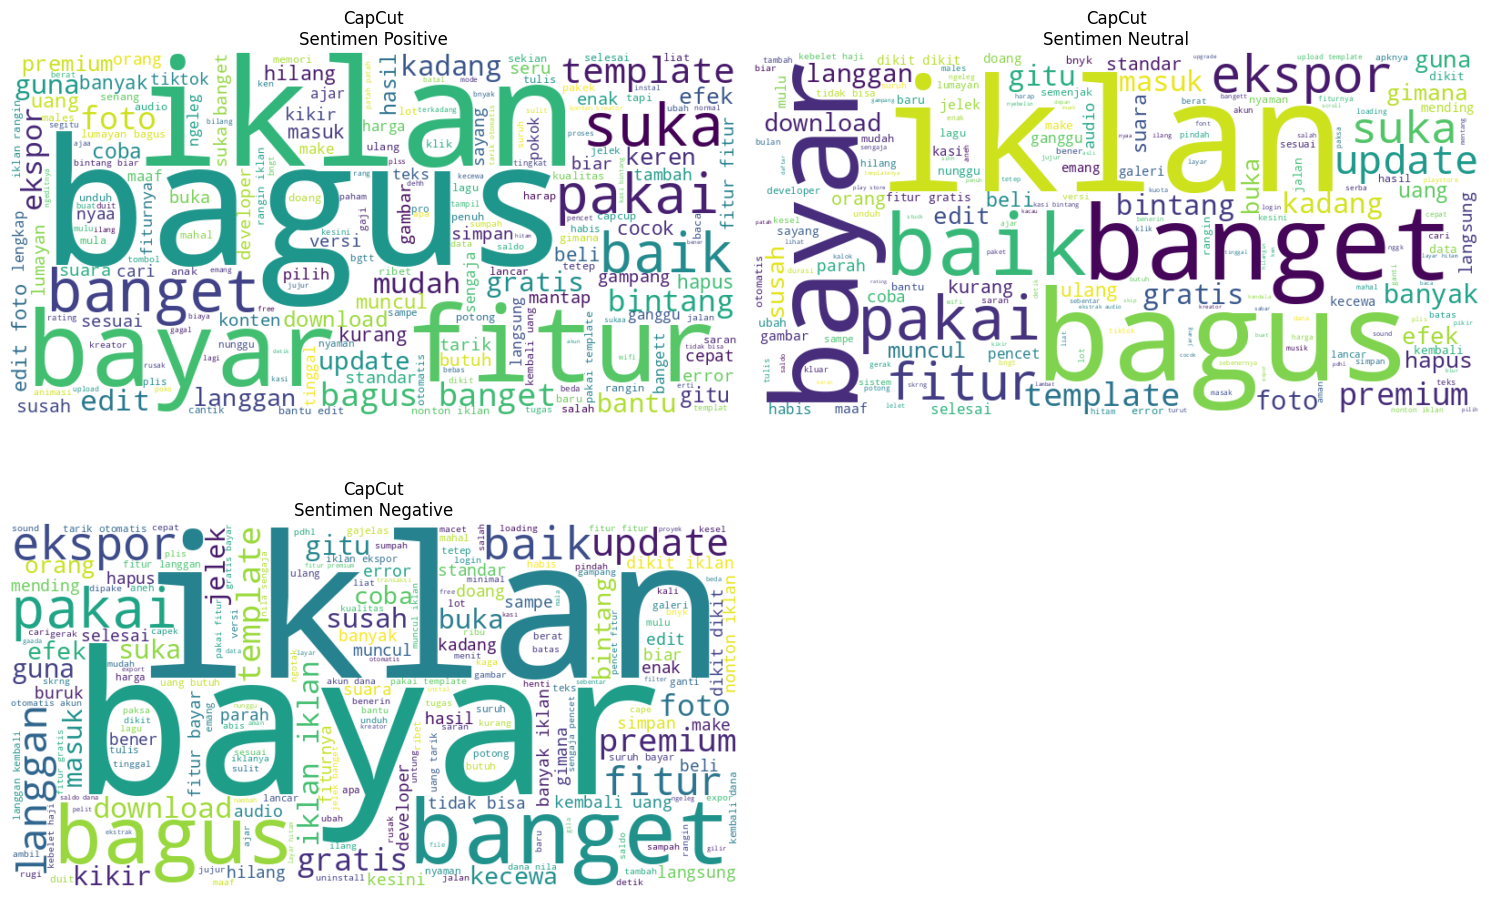

In [177]:
sentiments = ['Positive', 'Neutral', 'Negative']

plt.figure(figsize=(15, 10))

for i, sent in enumerate(sentiments, 1):
    text = ' '.join(df1[df1['sentiment_rating'] == sent]['Clean_Comment'])

    wordcloud = WordCloud(
        background_color="white",
        width=800,
        height=400
    ).generate(text)

    plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"CapCut\nSentimen {sent}")

    wordcloud.to_file(f"wordcloud_{sent.lower()}.png")

plt.tight_layout()
plt.show()

## 2. KINEMASTER

In [103]:
result, continuation_token = reviews(
    'com.nexstreaming.app.kinemasterfree',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=4000,
    filter_score_with=None
)
data2 = pd.DataFrame(np.array(result), columns=['review'])
data2 = data2.join(pd.DataFrame(data2.pop('review').tolist()))
data2.head()

reviewId         userName  \
0  ad1b6c8c-af1d-4642-bb40-00289f2daa29  Pengguna Google   
1  96072bdd-7681-4e40-ab57-0cc2b8c8dd59  Pengguna Google   
2  59abf89b-01ed-4744-b427-b05c55fe2a7e  Pengguna Google   
3  58c6e0f1-27cc-482c-b0b7-348f94210838  Pengguna Google   
4  d69299cf-b1cb-441a-975c-094658e81fe2  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  sumpah saya benar-benar kecewa sama versi baru...      1              5   
1  dari lama udah pake nih app buat ngedit video,...      5             36   
2  setelah Update terbaru Tampilannya makin futur...      3              2   
3  Bagus sih untuk mengedit, tapi selalu error ta...      3              0   
4  Ngebug min gak bisa pangkas kiri, gak bisa dia...      5              8   

  reviewCreatedVersion                  at  \
0       8.0.7.35886.GP 2025-12-12 19:28:28   
1       8.0.6.35848.GP 2025-12-11 10:25:39   
2       8.0.7.35886.GP 2025-12-15 10:06:26   
3       8.0.8.35914.GP 2025-12-26 09:31:11   
4       8.0.8.35914.GP 2025-12-21 09:20:27   

                                        replyContent           repliedAt  \
0  Halo, untuk mengakses musik Anda pribadi, untu... 2025-12-13 03:32:14   
1  Halo, terima kasih atas ulasan Anda tentang Ki... 2025-12-12 02:41:21   
2  Halo, monetisasi musik KineMaster di YouTube t... 2025-12-16 04:10:31   
3  Halo! Terima kasih atas ulasan Anda. Magic Rem... 2025-12-27 01:57:35   
4  Halo, jika Anda tidak dapat memotong atau mema... 2025-12-22 01:49:36   

       appVersion  
0  8.0.7.35886.GP  
1  8.0.6.35848.GP  
2  8.0.7.35886.GP  
3  8.0.8.35914.GP  
4  8.0.8.35914.GP

In [104]:
data2_baru = data2[['userName', 'content', 'score']]
data2 = data2_baru.rename(columns={'userName':'Nama Akun', 'content':'ulasan', 'score':'rating'})
data2.head()

Nama Akun                                             ulasan  rating
0  Pengguna Google  sumpah saya benar-benar kecewa sama versi baru...       1
1  Pengguna Google  dari lama udah pake nih app buat ngedit video,...       5
2  Pengguna Google  setelah Update terbaru Tampilannya makin futur...       3
3  Pengguna Google  Bagus sih untuk mengedit, tapi selalu error ta...       3
4  Pengguna Google  Ngebug min gak bisa pangkas kiri, gak bisa dia...       5

In [105]:
data2['rating'].value_counts()

rating
5    1729
4     718
1     678
3     495
2     380
Name: count, dtype: int64

### preprocessing data

In [106]:
df2 = pd.DataFrame(data2)

In [178]:
df2["clean_comment"] = df2["ulasan"].apply(lambda x: text_preprocessing(x, stop_words, slang_dict, stemmer))
df2.head()

Nama Akun                                             ulasan  rating  \
0  Pengguna Google  sumpah saya benar-benar kecewa sama versi baru...       1   
1  Pengguna Google  dari lama udah pake nih app buat ngedit video,...       5   
2  Pengguna Google  setelah Update terbaru Tampilannya makin futur...       3   
3  Pengguna Google  Bagus sih untuk mengedit, tapi selalu error ta...       3   
4  Pengguna Google  Ngebug min gak bisa pangkas kiri, gak bisa dia...       5   

                                       clean_comment sentiment_rating  \
0  sumpah kecewa versi bagus logo musik audio kli...         Negative   
1  pakai emang best selesai update tampil potrait...         Positive   
2  update baru tampil futuristik keren jengkel fi...          Neutral   
3  bagus edit error henti hapus latar belakang ka...          Neutral   
4  pangkas kiri akal aduhh banyak kotak katik ker...         Positive   

  sentiment_lexicon  
0          Positive  
1          Positive  
2          Negative  
3           Neutral  
4          Positive

In [108]:
#cek data kosong
df2.isnull().sum()

Nama Akun        0
ulasan           0
rating           0
clean_comment    0
dtype: int64

In [109]:
#cek data yang sama
df2.duplicated().any()

np.False_

### pelabelan data

In [110]:
df2['sentiment_rating'] = df2['rating'].apply(sentiment_from_rating)

In [111]:
df2['sentiment_lexicon'] = df2['clean_comment'].apply(sentiment_lexicon)

In [233]:
print("Jumlah data awal :", len(df2))

# Validasi: rating == lexicon
df2_valid = df2[df2['sentiment_rating'] == df2['sentiment_lexicon']].copy()
df2_invalid = df2[df2['sentiment_rating'] != df2['sentiment_lexicon']].copy()
print("Jumlah data setelah validasi :", len(df2_valid))
print("Jumlah data tidak valid (dihapus) :", len(df2_invalid))

Jumlah data awal : 4000
Jumlah data setelah validasi : 2291
Jumlah data tidak valid (dihapus) : 1709


In [234]:
df2_valid['app_name'] = 'KineMaster'

## Distribusi Data

In [114]:
rating_counts = df2['sentiment_rating'].value_counts()
lexicon_counts = df2['sentiment_lexicon'].value_counts()

comparison_df = pd.DataFrame({
    'Rating-Based': rating_counts,
    'Lexicon-Based': lexicon_counts
}).fillna(0)

comparison_df = comparison_df.reindex(['Positive', 'Neutral', 'Negative'])

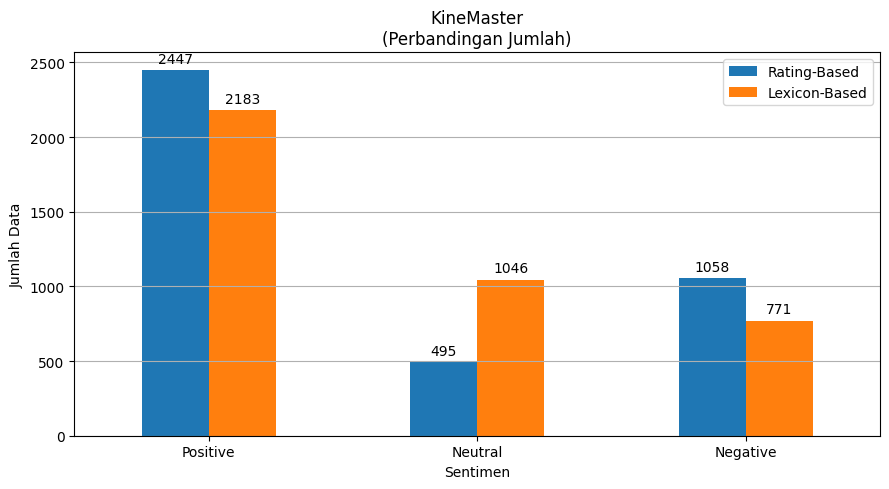

In [115]:
ax = comparison_df.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title('KineMaster\n(Perbandingan Jumlah)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

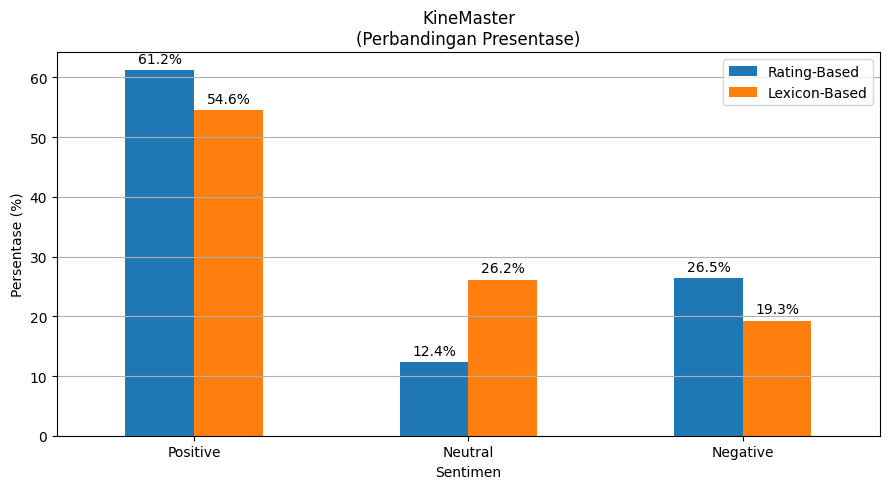

In [116]:
percentage_df = comparison_df.div(comparison_df.sum(axis=0), axis=1) * 100

ax = percentage_df.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title('KineMaster\n(Perbandingan Presentase)')
plt.xlabel('Sentimen')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

In [117]:
df2.head()

Nama Akun                                             ulasan  rating  \
0  Pengguna Google  sumpah saya benar-benar kecewa sama versi baru...       1   
1  Pengguna Google  dari lama udah pake nih app buat ngedit video,...       5   
2  Pengguna Google  setelah Update terbaru Tampilannya makin futur...       3   
3  Pengguna Google  Bagus sih untuk mengedit, tapi selalu error ta...       3   
4  Pengguna Google  Ngebug min gak bisa pangkas kiri, gak bisa dia...       5   

                                       clean_comment sentiment_rating  \
0  sumpah kecewa versi bagus logo musik audio kli...         Negative   
1  pake emang best selesai update tampil potrait ...         Positive   
2  update baru tampil futuristik keren jengkel fi...          Neutral   
3  bagus edit error henti hapus latar belakang ka...          Neutral   
4  pangkas kiri akal aduhh banyak kotak katik ker...         Positive   

  sentiment_lexicon  
0          Positive  
1          Positive  
2          Negative  
3           Neutral  
4          Positive

In [ ]:
# Simpan hasil preprocessing
# df.to_csv('hasilAkhir_kinemaster.csv', index=False, encoding="utf-8-sig")

### Visualisasi N-Gram dan WordCloud

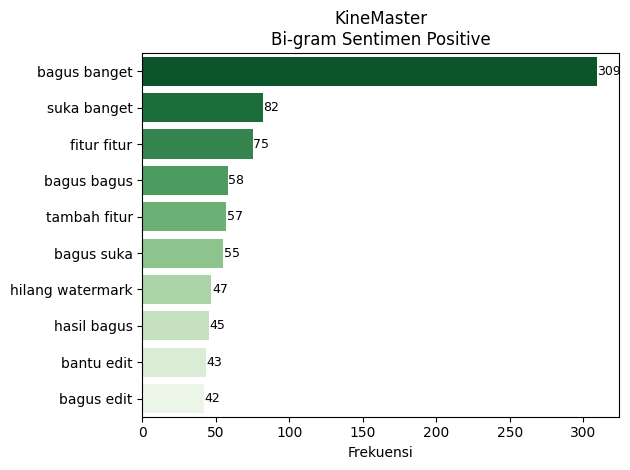

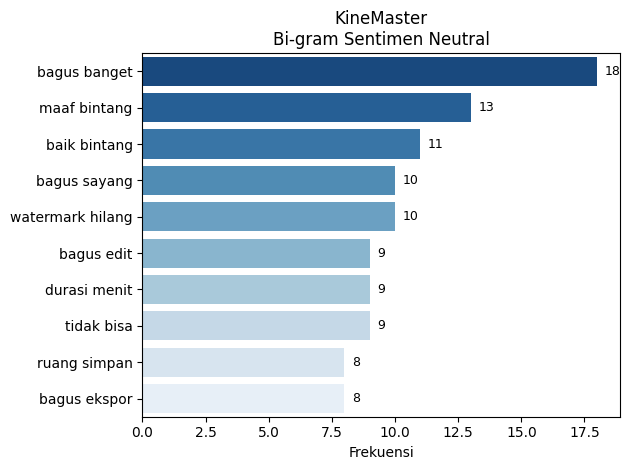

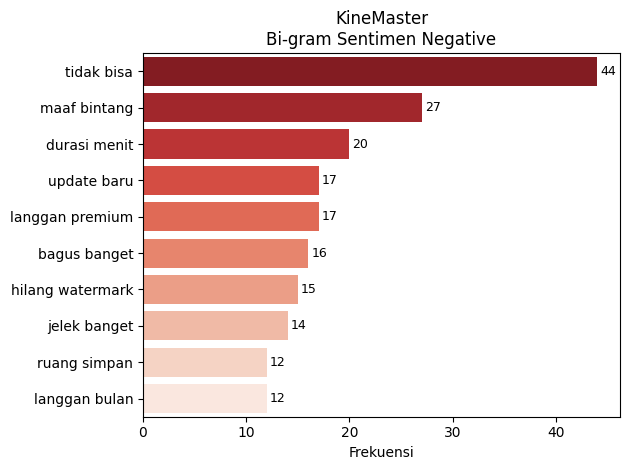

In [179]:
for sent in ['Positive', 'Neutral', 'Negative']:
    plot_ngram(
        df=df2,
        sentiment=sent,
        text_col='clean_comment',
        n=2,
        top_n=10,
        app_name="KineMaster"
    )

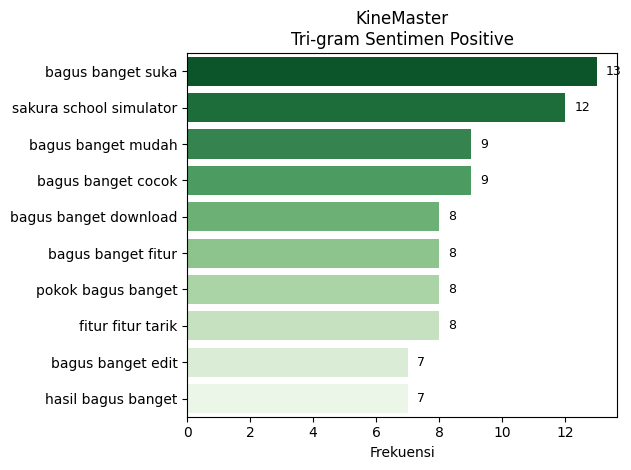

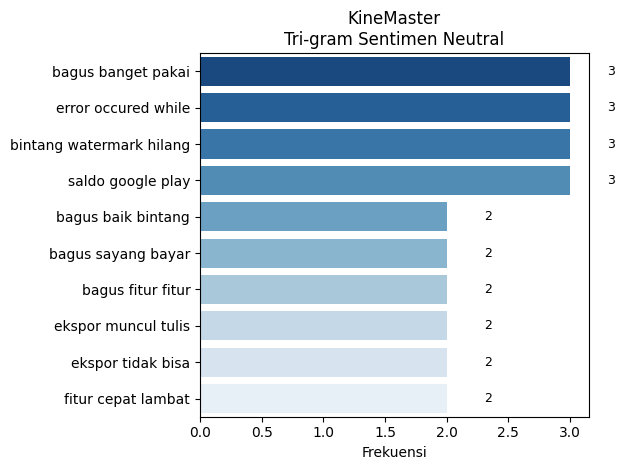

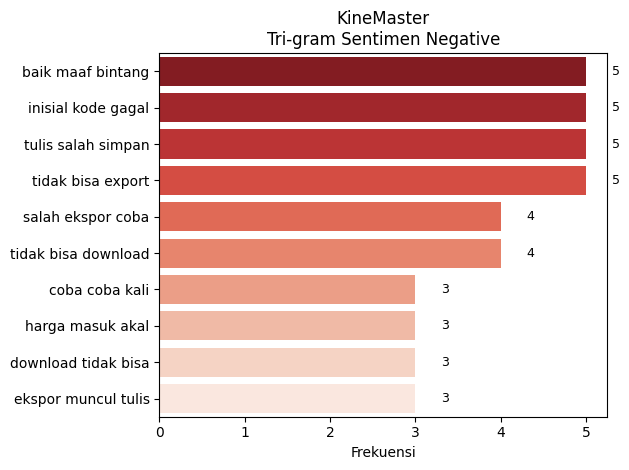

In [180]:
# Tri-gram
for sent in ['Positive', 'Neutral', 'Negative']:
    plot_ngram(
        df=df2,
        sentiment=sent,
        text_col='clean_comment',
        n=3,
        top_n=10,
        app_name="KineMaster"
    )

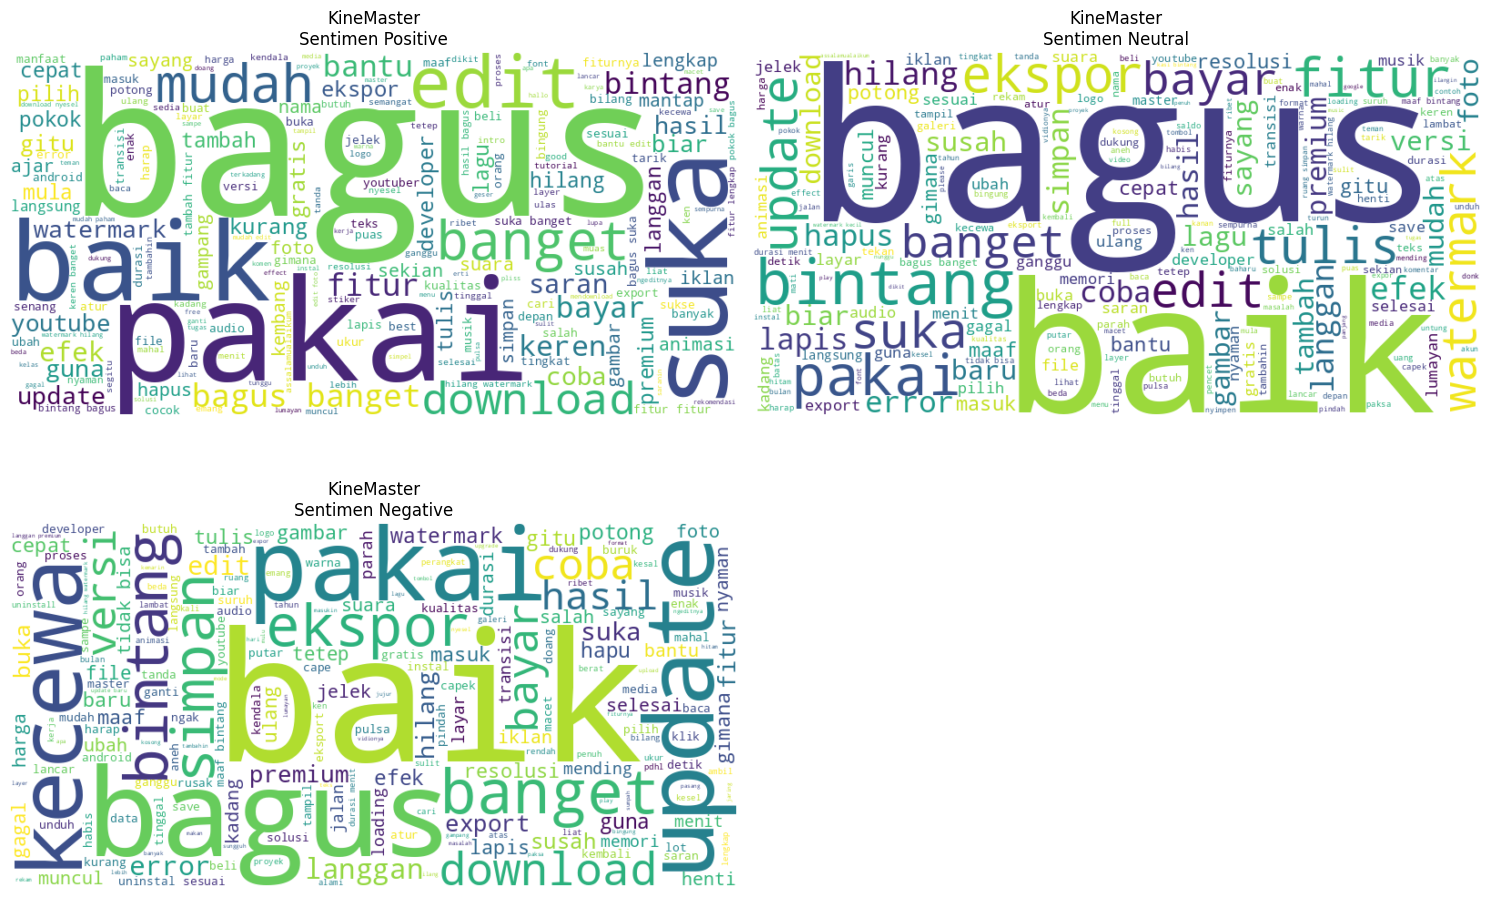

In [181]:
sentiments = ['Positive', 'Neutral', 'Negative']

plt.figure(figsize=(15, 10))

for i, sent in enumerate(sentiments, 1):
    text = ' '.join(df2[df2['sentiment_rating'] == sent]['clean_comment'])

    wordcloud = WordCloud(
        background_color="white",
        width=800,
        height=400
    ).generate(text)

    plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"KineMaster\nSentimen {sent}")

    wordcloud.to_file(f"wordcloud_{sent.lower()}.png")

plt.tight_layout()
plt.show()

## 3. INSHOT

In [182]:
result, continuation_token = reviews(
    'com.camerasideas.instashot',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=4000,
    filter_score_with=None
)
data3 = pd.DataFrame(np.array(result), columns=['review'])
data3 = data3.join(pd.DataFrame(data3.pop('review').tolist()))
data3.head()

reviewId         userName  \
0  52dd2c71-1d90-4421-8e4a-8a3f78929a00  Pengguna Google   
1  02cd7f93-ef97-469c-85d4-120835090374  Pengguna Google   
2  dd481bde-6c96-49d0-9819-4d7df8004972  Pengguna Google   
3  d0376484-265d-47d4-945a-8aa847e9253b  Pengguna Google   
4  636f2882-dcd2-4d3f-954e-4286e2db4708  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  semuanya bagus, tapi masalahnya aplikasinya su...      5             27   
1  suka banget ngga bikin hp jadi lalot, cocok ba...      5            171   
2  Fiturnya lengkap dan gratis meskipun kalau mau...      5             99   
3  srius apk nya bagus banget dan bisa di gunakan...      5            188   
4  Buat fitur text to speech nya blum ada versi b...      4              0   

  reviewCreatedVersion                  at  \
0           2.175.1517 2025-12-23 05:26:47   
1           2.162.1510 2025-10-27 03:49:11   
2           2.163.1511 2025-11-16 06:28:04   
3           2.175.1517 2025-11-22 08:02:49   
4           2.175.1517 2025-12-25 01:07:24   

                                        replyContent           repliedAt  \
0                                               None                 NaT   
1                                               None                 NaT   
2                                               None                 NaT   
3  Pengguna yang Terhormat, Kami selalu berupaya ... 2025-11-24 03:03:00   
4                                               None                 NaT   

   appVersion  
0  2.175.1517  
1  2.162.1510  
2  2.163.1511  
3  2.175.1517  
4  2.175.1517

In [183]:
data3_baru = data3[['userName', 'content', 'score']]
data3 = data3_baru.rename(columns={'userName':'Nama Akun', 'content':'ulasan', 'score':'rating'})
data3.head()

Nama Akun                                             ulasan  rating
0  Pengguna Google  semuanya bagus, tapi masalahnya aplikasinya su...       5
1  Pengguna Google  suka banget ngga bikin hp jadi lalot, cocok ba...       5
2  Pengguna Google  Fiturnya lengkap dan gratis meskipun kalau mau...       5
3  Pengguna Google  srius apk nya bagus banget dan bisa di gunakan...       5
4  Pengguna Google  Buat fitur text to speech nya blum ada versi b...       4

In [184]:
data3['rating'].value_counts()

rating
5    2418
4     654
3     398
1     327
2     203
Name: count, dtype: int64

### preprocessing data

In [185]:
df3 = pd.DataFrame(data3)

In [186]:
df3["clean_comment"] = df3["ulasan"].apply(lambda x: text_preprocessing(x, stop_words, slang_dict, stemmer))
df3.head()

Nama Akun                                             ulasan  rating  \
0  Pengguna Google  semuanya bagus, tapi masalahnya aplikasinya su...       5   
1  Pengguna Google  suka banget ngga bikin hp jadi lalot, cocok ba...       5   
2  Pengguna Google  Fiturnya lengkap dan gratis meskipun kalau mau...       5   
3  Pengguna Google  srius apk nya bagus banget dan bisa di gunakan...       5   
4  Pengguna Google  Buat fitur text to speech nya blum ada versi b...       4   

                                       clean_comment  
0  bagus notifikasi mogok alas sendiri coba hapus...  
1  suka banget lalot cocok banget tugas kuliah si...  
2  fiturnya lengkap gratis lengkap premium fitur ...  
3  srius bagus banget offline efek diunload simpa...  
4  fitur text speech blum versi bahasa indonesia ...

In [187]:
#cek data kosong
df3.isnull().sum()

Nama Akun        0
ulasan           0
rating           0
clean_comment    0
dtype: int64

In [188]:
#cek data yang sama
df3.duplicated().any()

np.True_

### pelabelan data

In [189]:
df3['sentiment_rating'] = df3['rating'].apply(sentiment_from_rating)

In [190]:
df3['sentiment_lexicon'] = df3['clean_comment'].apply(sentiment_lexicon)

In [238]:
print("Jumlah data awal :", len(df3))

# Validasi: rating == lexicon
df3_valid = df3[df3['sentiment_rating'] == df3['sentiment_lexicon']].copy()
df3_invalid = df3[df3['sentiment_rating'] != df3['sentiment_lexicon']].copy()
print("Jumlah data setelah validasi :", len(df3_valid))
print("Jumlah data tidak valid (dihapus) :", len(df3_invalid))

Jumlah data awal : 4000
Jumlah data setelah validasi : 2610
Jumlah data tidak valid (dihapus) : 1390


In [239]:
df3_valid['app_name'] = 'Inshot'

## Distribusi Data

In [193]:
rating_counts = df3['sentiment_rating'].value_counts()
lexicon_counts = df3['sentiment_lexicon'].value_counts()

comparison_df = pd.DataFrame({
    'Rating-Based': rating_counts,
    'Lexicon-Based': lexicon_counts
}).fillna(0)

comparison_df = comparison_df.reindex(['Positive', 'Neutral', 'Negative'])

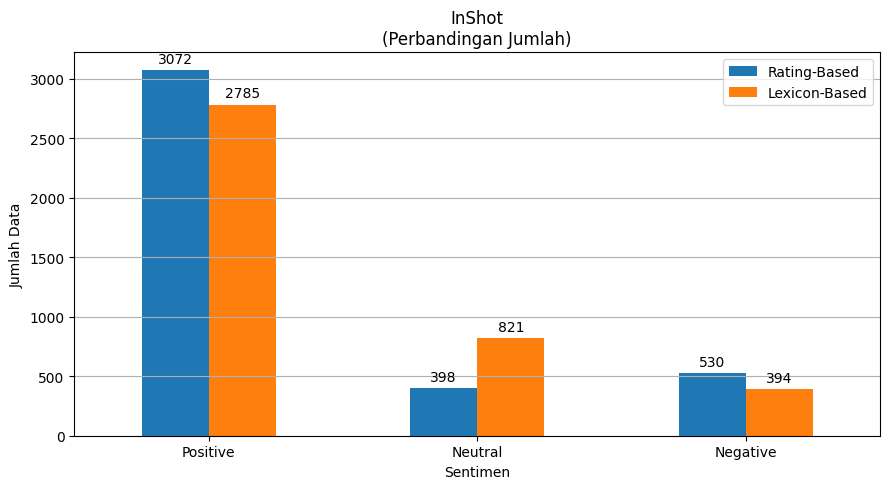

In [194]:
ax = comparison_df.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title('InShot\n(Perbandingan Jumlah)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

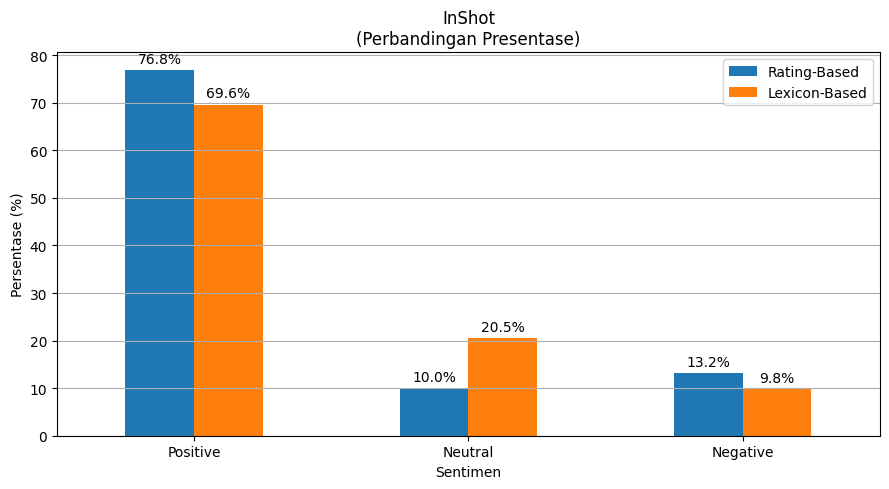

In [195]:
percentage_df = comparison_df.div(comparison_df.sum(axis=0), axis=1) * 100

ax = percentage_df.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title('InShot\n(Perbandingan Presentase)')
plt.xlabel('Sentimen')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

In [196]:
df3.head()

Nama Akun                                             ulasan  rating  \
0  Pengguna Google  semuanya bagus, tapi masalahnya aplikasinya su...       5   
1  Pengguna Google  suka banget ngga bikin hp jadi lalot, cocok ba...       5   
2  Pengguna Google  Fiturnya lengkap dan gratis meskipun kalau mau...       5   
3  Pengguna Google  srius apk nya bagus banget dan bisa di gunakan...       5   
4  Pengguna Google  Buat fitur text to speech nya blum ada versi b...       4   

                                       clean_comment sentiment_rating  \
0  bagus notifikasi mogok alas sendiri coba hapus...         Positive   
1  suka banget lalot cocok banget tugas kuliah si...         Positive   
2  fiturnya lengkap gratis lengkap premium fitur ...         Positive   
3  srius bagus banget offline efek diunload simpa...         Positive   
4  fitur text speech blum versi bahasa indonesia ...         Positive   

  sentiment_lexicon  
0           Neutral  
1          Positive  
2           Neutral  
3          Positive  
4          Positive

In [ ]:
# Simpan hasil preprocessing
# df.to_csv('hasilAkhir_inshotr.csv', index=False, encoding="utf-8-sig")

### Visualisasi N-Gram dan WordCloud

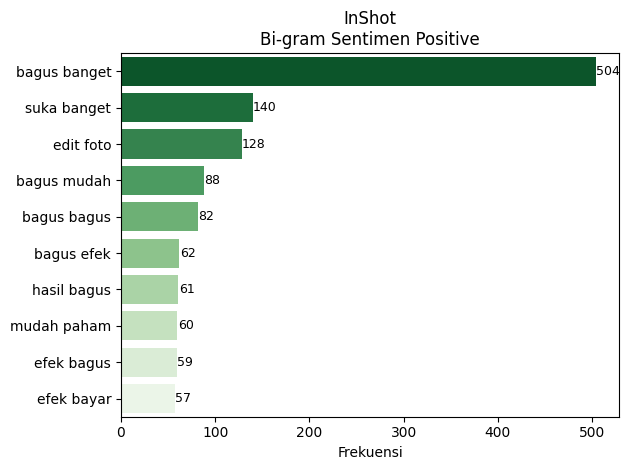

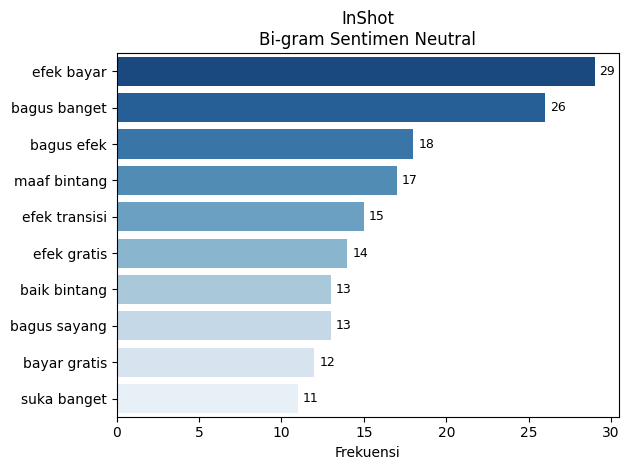

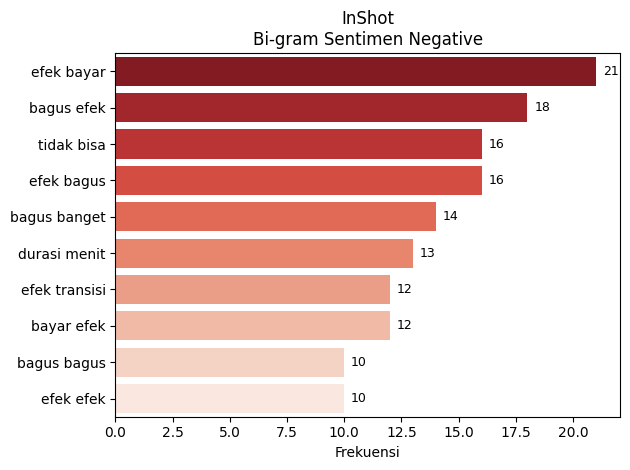

In [198]:
for sent in ['Positive', 'Neutral', 'Negative']:
    plot_ngram(
        df=df3,
        sentiment=sent,
        text_col='clean_comment',
        n=2,
        top_n=10,
        app_name="InShot"
    )

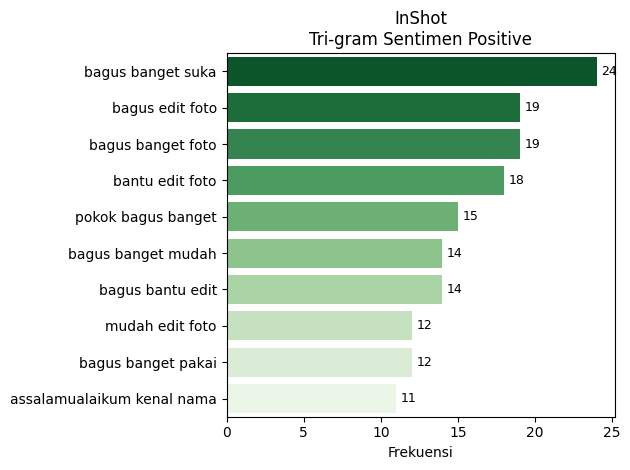

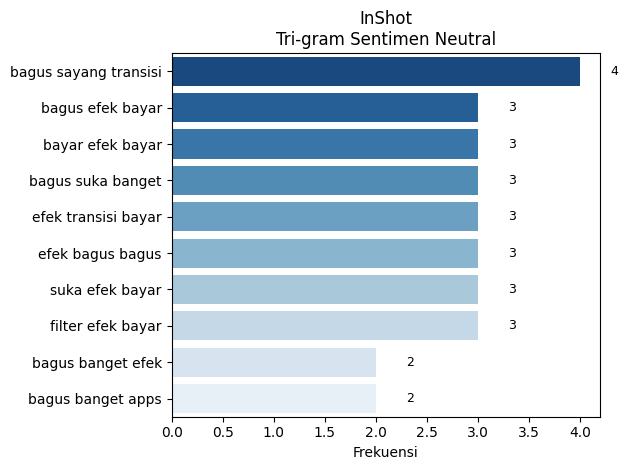

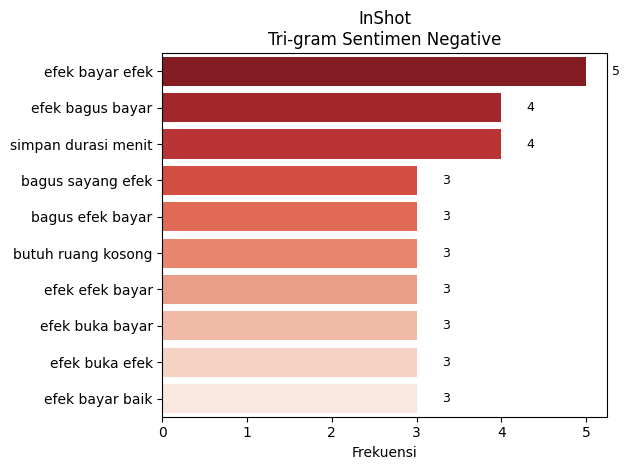

In [199]:
# Tri-gram
for sent in ['Positive', 'Neutral', 'Negative']:
    plot_ngram(
        df=df3,
        sentiment=sent,
        text_col='clean_comment',
        n=3,
        top_n=10,
        app_name="InShot"
    )

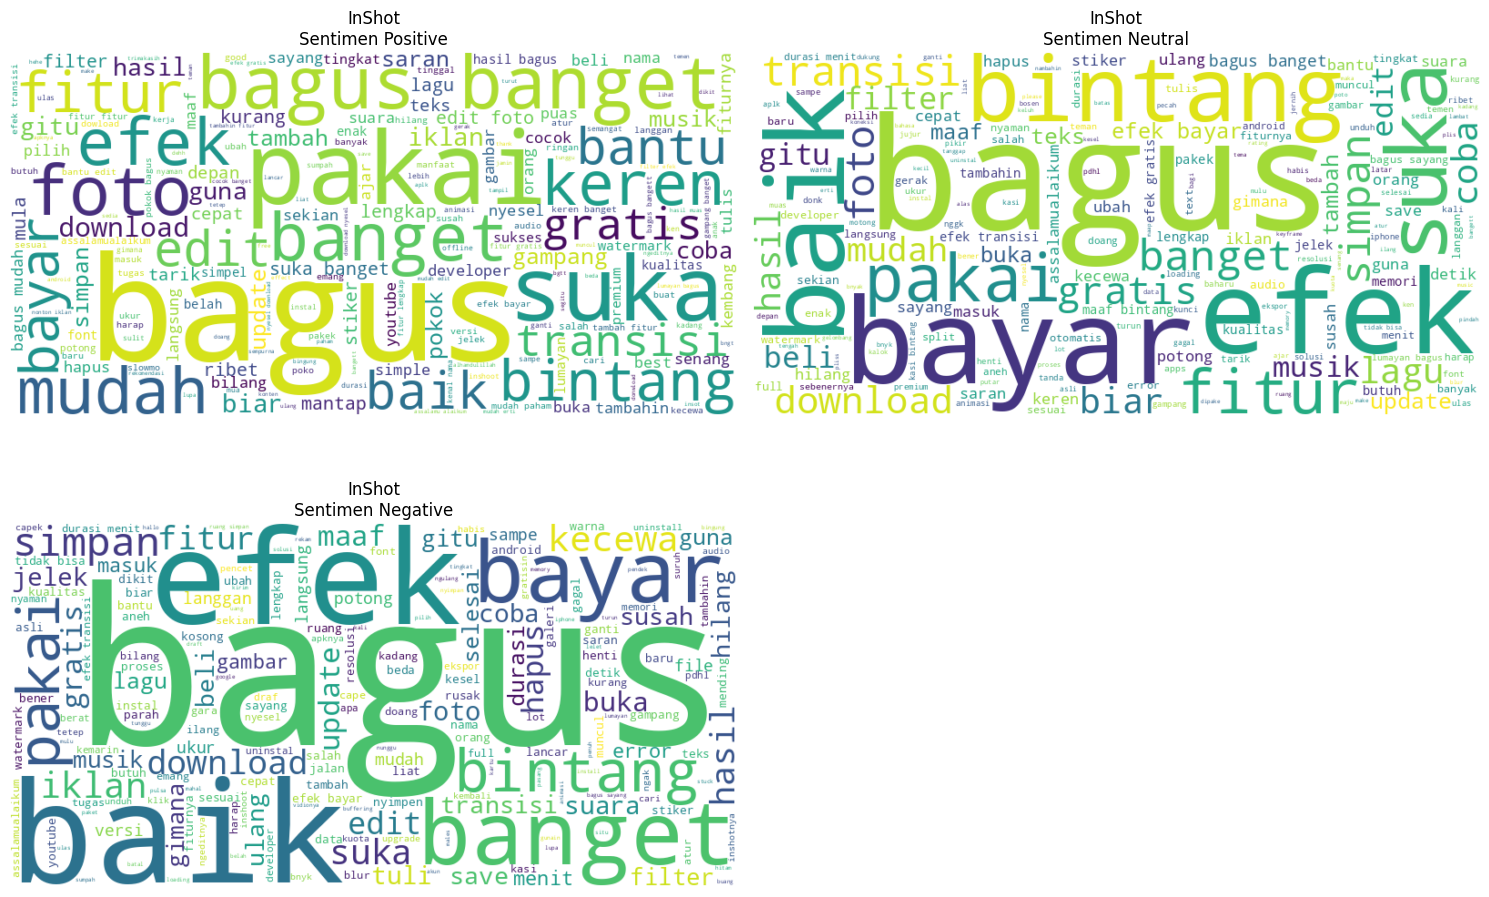

In [200]:
sentiments = ['Positive', 'Neutral', 'Negative']

plt.figure(figsize=(15, 10))

for i, sent in enumerate(sentiments, 1):
    text = ' '.join(df3[df3['sentiment_rating'] == sent]['clean_comment'])

    wordcloud = WordCloud(
        background_color="white",
        width=800,
        height=400
    ).generate(text)

    plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"InShot\nSentimen {sent}")

    wordcloud.to_file(f"wordcloud_{sent.lower()}.png")

plt.tight_layout()
plt.show()

## 4. VN

In [201]:
result, continuation_token = reviews(
    'com.frontrow.vlog',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=4000,
    filter_score_with=None
)
data4 = pd.DataFrame(np.array(result), columns=['review'])
data4 = data4.join(pd.DataFrame(data4.pop('review').tolist()))
data4.head()

reviewId         userName  \
0  a407011f-5e40-47d7-a668-6fa77cefa80a  Pengguna Google   
1  2f72101f-d4ce-4a50-a3e9-23f40ab88103  Pengguna Google   
2  3d79197c-b308-42de-8c1d-157158e85862  Pengguna Google   
3  746ed460-c6be-4bd7-9d27-cd031bdfe1e6  Pengguna Google   
4  7adb1571-80e1-4521-99fb-2f3588d46790  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  Sebelum di update pada fitur tambahkan sticker...      5            129   
1  No. Tidak saya rekomendasikan, karna ngedit ca...      1              2   
2  tolls nya sangat berguna semua, menjadikan say...      4              0   
3  Untuk penggunaan fx pada video masih suka bug....      3              0   
4  Alhamdulillah,Developernya baik banget ngasih ...      5             18   

  reviewCreatedVersion                  at replyContent repliedAt appVersion  
0                2.9.9 2025-12-21 13:23:59         None       NaT      2.9.9  
1                2.9.7 2025-12-14 17:22:06         None       NaT      2.9.7  
2                2.9.9 2025-12-25 15:54:17         None       NaT      2.9.9  
3                2.9.6 2025-12-09 03:04:30         None       NaT      2.9.6  
4                2.9.8 2025-12-19 18:48:19         None       NaT      2.9.8

In [202]:
data4_baru = data4[['userName', 'content', 'score']]
data4 = data4_baru.rename(columns={'userName':'Nama Akun', 'content':'ulasan', 'score':'rating'})
data4.head()

Nama Akun                                             ulasan  rating
0  Pengguna Google  Sebelum di update pada fitur tambahkan sticker...       5
1  Pengguna Google  No. Tidak saya rekomendasikan, karna ngedit ca...       1
2  Pengguna Google  tolls nya sangat berguna semua, menjadikan say...       4
3  Pengguna Google  Untuk penggunaan fx pada video masih suka bug....       3
4  Pengguna Google  Alhamdulillah,Developernya baik banget ngasih ...       5

In [203]:
data4['rating'].value_counts()

rating
5    1869
1     751
4     588
3     478
2     314
Name: count, dtype: int64

### preprocessing data

In [204]:
df4 = pd.DataFrame(data4)

In [227]:
df4["clean_comment"] = df4["ulasan"].apply(lambda x: text_preprocessing(x, stop_words, slang_dict, stemmer))
df4.head()

Nama Akun                                             ulasan  rating  \
0  Pengguna Google  Sebelum di update pada fitur tambahkan sticker...       5   
1  Pengguna Google  No. Tidak saya rekomendasikan, karna ngedit ca...       1   
2  Pengguna Google  tolls nya sangat berguna semua, menjadikan say...       4   
3  Pengguna Google  Untuk penggunaan fx pada video masih suka bug....       3   
4  Pengguna Google  Alhamdulillah,Developernya baik banget ngasih ...       5   

                                       clean_comment sentiment_rating  \
0  update fitur tambah sticker pilih elemen giphy...         Positive   
1  rekomendasi capek capek hilang buang guys bint...         Negative   
2  tolls guna jadi mudah kreasi fitur fitur subti...         Positive   
3  guna suka mana pilih clip pilih klik baik gang...          Neutral   
4  alhamdulillah developer banget ngasih gratis h...         Positive   

  sentiment_lexicon  
0           Neutral  
1          Positive  
2          Positive  
3          Positive  
4          Negative

In [206]:
#cek data kosong
df4.isnull().sum()

Nama Akun        0
ulasan           0
rating           0
clean_comment    0
dtype: int64

In [207]:
#cek data yang sama
df4.duplicated().any()

np.True_

### pelabelan data

In [208]:
df4['sentiment_rating'] = df4['rating'].apply(sentiment_from_rating)

In [209]:
df4['sentiment_lexicon'] = df4['clean_comment'].apply(sentiment_lexicon)

In [210]:
print("Jumlah data awal :", len(df4))

# Validasi: rating == lexicon
df4_valid = df4[df4['sentiment_rating'] == df4['sentiment_lexicon']].copy()
df4_invalid = df2[df2['sentiment_rating'] != df2['sentiment_lexicon']].copy()
print("Jumlah data setelah validasi :", len(df4_valid))
print("Jumlah data tidak valid (dihapus) :", len(df2_invalid))

Jumlah data awal : 4000
Jumlah data setelah validasi : 2316
Jumlah data tidak valid (dihapus) : 1709


In [211]:
df4_valid['app_name'] = 'VN'

## Distribusi Data

In [212]:
rating_counts = df4['sentiment_rating'].value_counts()
lexicon_counts = df4['sentiment_lexicon'].value_counts()

comparison_df = pd.DataFrame({
    'Rating-Based': rating_counts,
    'Lexicon-Based': lexicon_counts
}).fillna(0)

comparison_df = comparison_df.reindex(['Positive', 'Neutral', 'Negative'])

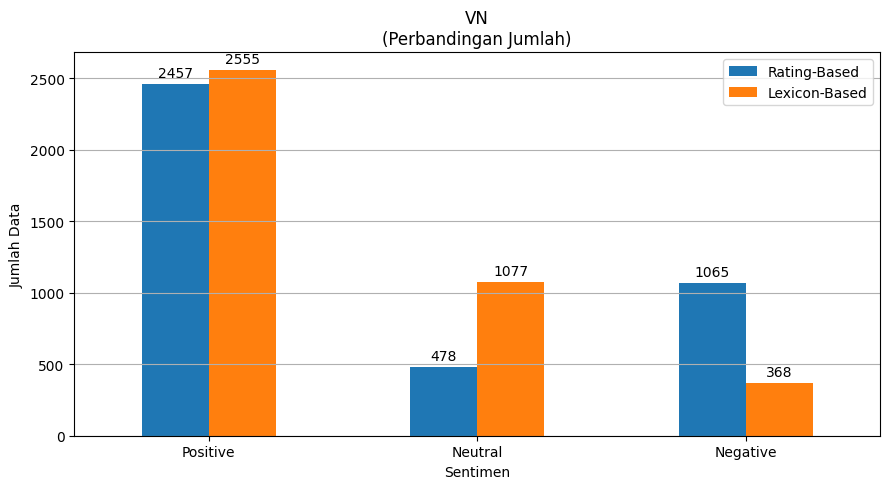

In [213]:
ax = comparison_df.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title('VN\n(Perbandingan Jumlah)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

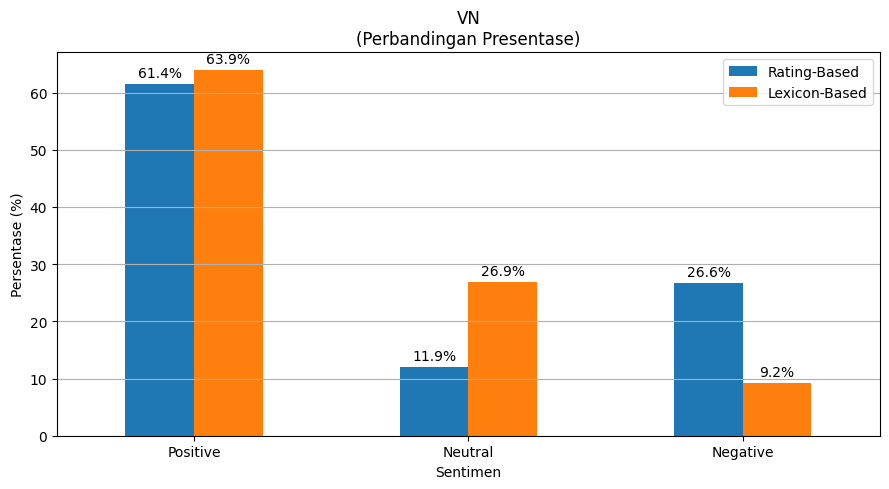

In [214]:
percentage_df = comparison_df.div(comparison_df.sum(axis=0), axis=1) * 100

ax = percentage_df.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title('VN\n(Perbandingan Presentase)')
plt.xlabel('Sentimen')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

In [215]:
df4.head()

Nama Akun                                             ulasan  rating  \
0  Pengguna Google  Sebelum di update pada fitur tambahkan sticker...       5   
1  Pengguna Google  No. Tidak saya rekomendasikan, karna ngedit ca...       1   
2  Pengguna Google  tolls nya sangat berguna semua, menjadikan say...       4   
3  Pengguna Google  Untuk penggunaan fx pada video masih suka bug....       3   
4  Pengguna Google  Alhamdulillah,Developernya baik banget ngasih ...       5   

                                       clean_comment sentiment_rating  \
0  update fitur tambah sticker pilih elemen giphy...         Positive   
1  rekomendasi capek capek hilang buang guys bint...         Negative   
2  tolls guna jadi mudah kreasi fitur fitur subti...         Positive   
3  guna suka mana pilih clip pilih klik baik gang...          Neutral   
4  alhamdulillah developer banget ngasih gratis h...         Positive   

  sentiment_lexicon  
0           Neutral  
1          Positive  
2          Positive  
3          Positive  
4          Negative

In [ ]:
# Simpan hasil preprocessing
# df.to_csv('hasilAkhir_vn.csv', index=False, encoding="utf-8-sig")

### Visualisasi N-Gram dan WordCloud

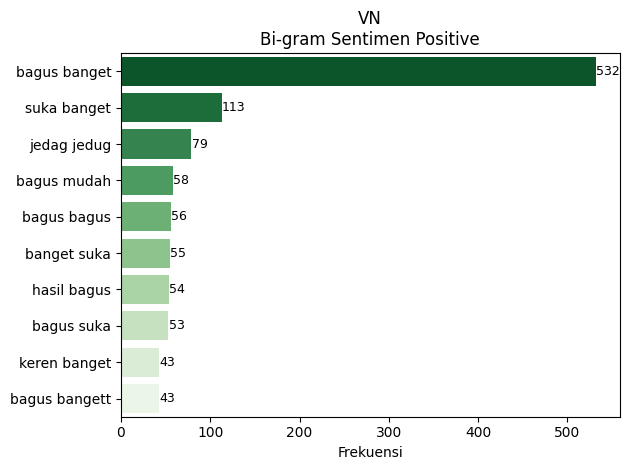

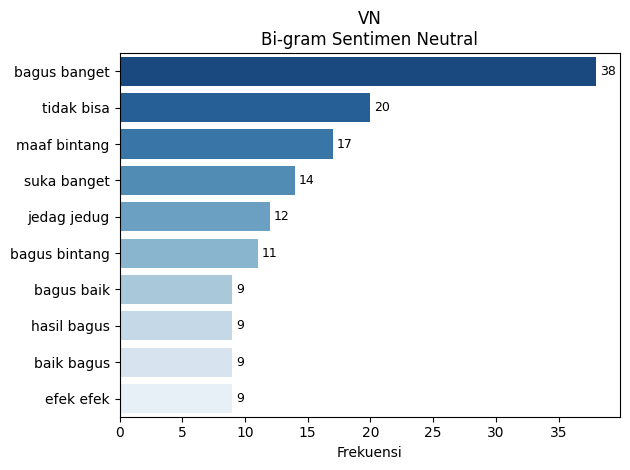

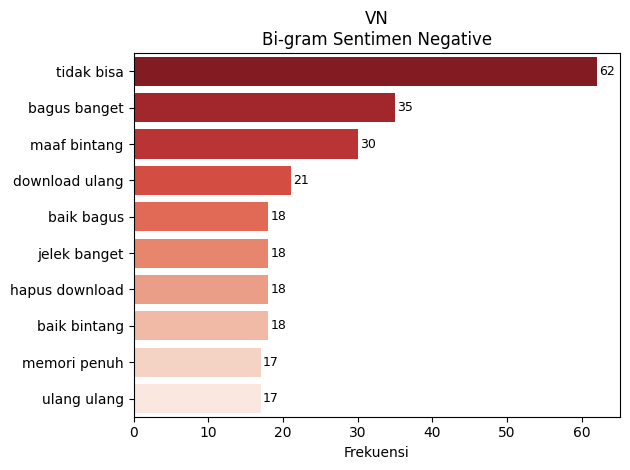

In [228]:
for sent in ['Positive', 'Neutral', 'Negative']:
    plot_ngram(
        df=df4,
        sentiment=sent,
        text_col='clean_comment',
        n=2,
        top_n=10,
        app_name="VN"
    )

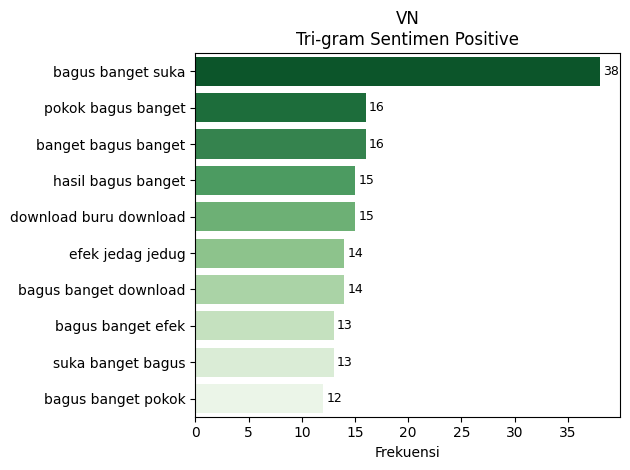

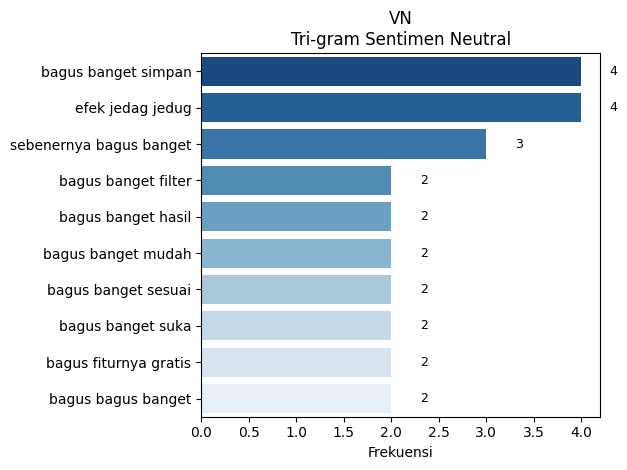

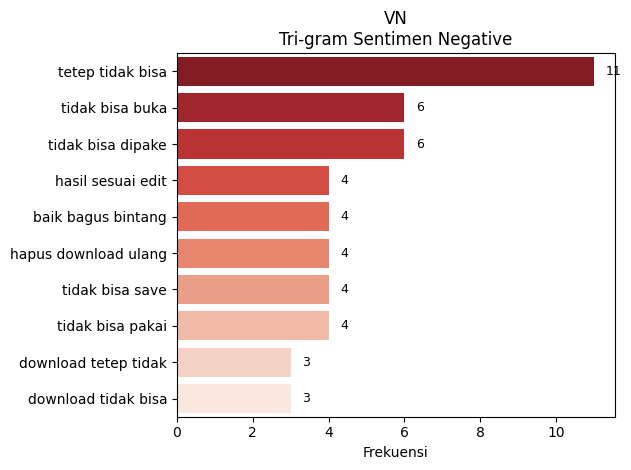

In [229]:
# Tri-gram
for sent in ['Positive', 'Neutral', 'Negative']:
    plot_ngram(
        df=df4,
        sentiment=sent,
        text_col='clean_comment',
        n=3,
        top_n=10,
        app_name="VN"
    )

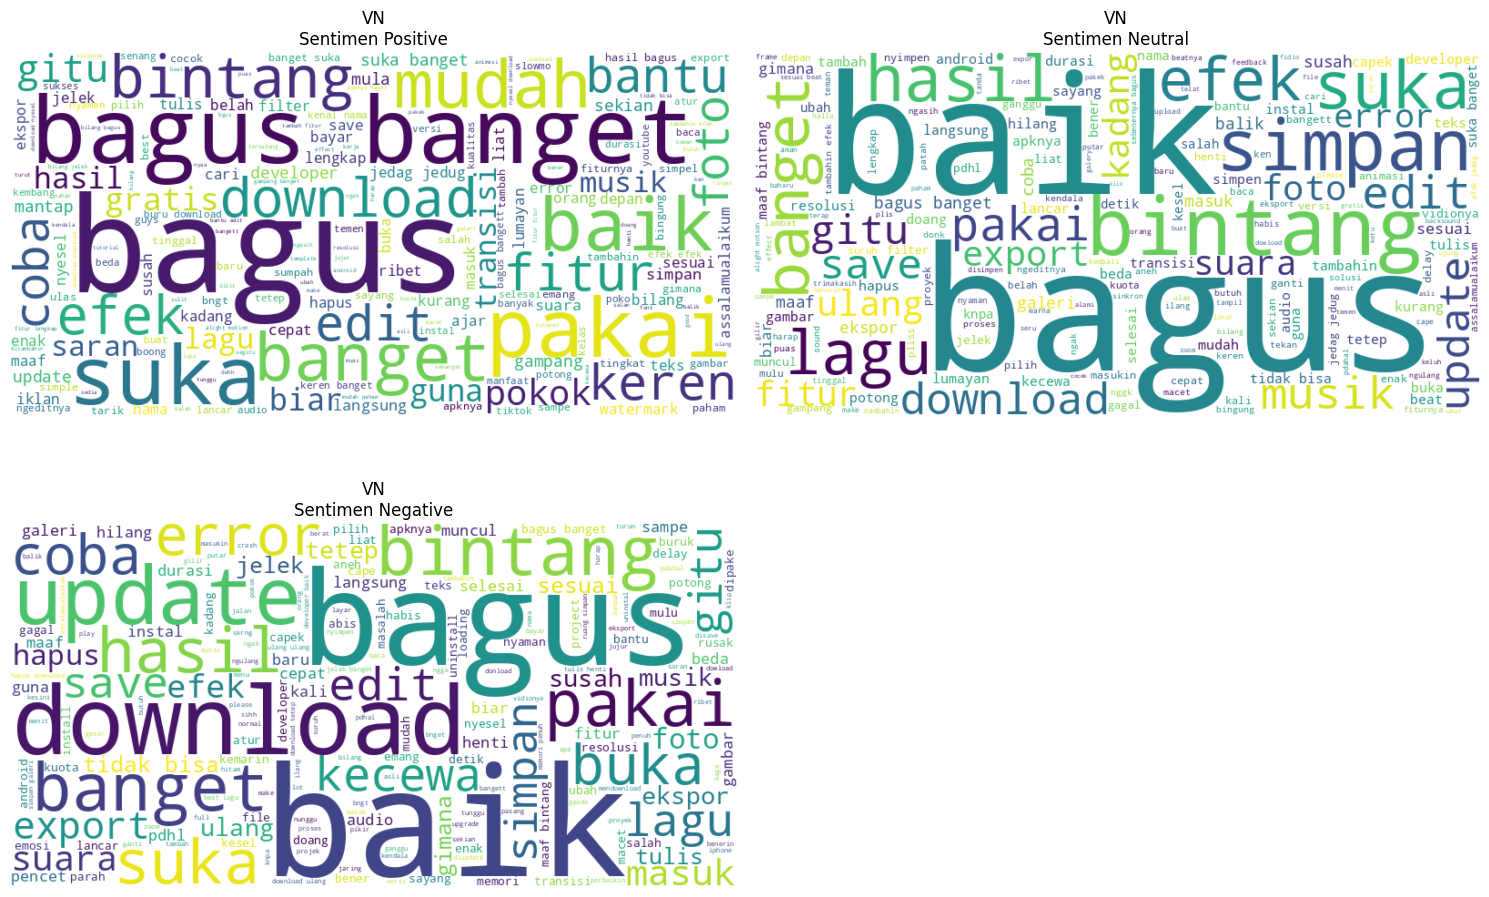

In [231]:
sentiments = ['Positive', 'Neutral', 'Negative']

plt.figure(figsize=(15, 10))

for i, sent in enumerate(sentiments, 1):
    text = ' '.join(df4[df4['sentiment_rating'] == sent]['clean_comment'])

    wordcloud = WordCloud(
        background_color="white",
        width=800,
        height=400
    ).generate(text)

    plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"VN\nSentimen {sent}")

    wordcloud.to_file(f"wordcloud_{sent.lower()}.png")

plt.tight_layout()
plt.show()

In [240]:
df_all_valid = pd.concat([
    df1_valid,
    df2_valid,
    df3_valid,
    df4_valid
])

In [241]:
df_plot = (
    df_all_valid['sentiment_rating']
    .groupby(df_all_valid['app_name'])
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)

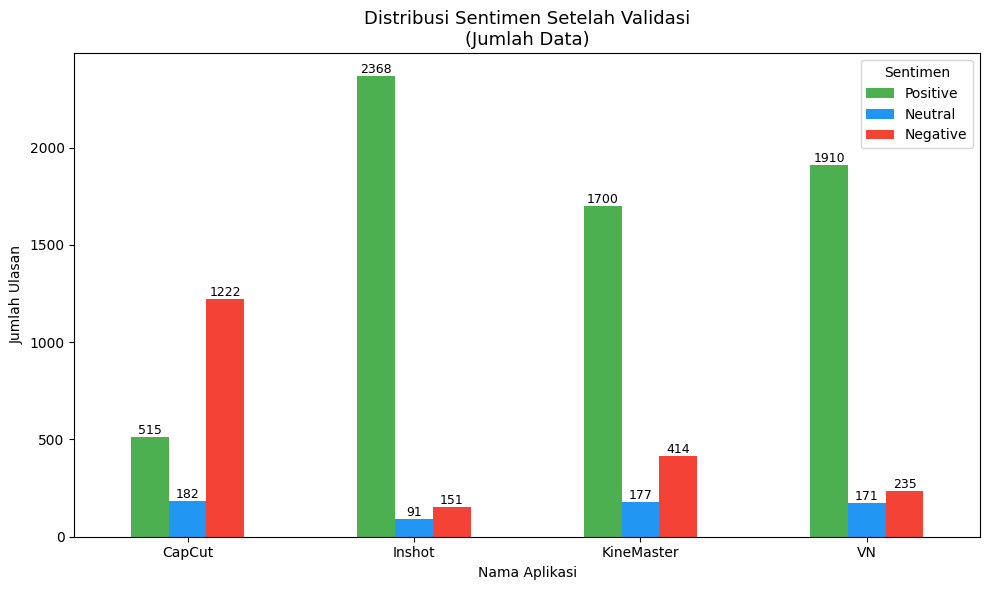

In [242]:
df_plot.set_index('app_name')[['Positive','Neutral','Negative']].plot(
    kind='bar',
    figsize=(10,6),
    color=['#4CAF50', '#2196F3', '#F44336']
)

plt.title(
    "Distribusi Sentimen Setelah Validasi\n(Jumlah Data)",
    fontsize=13
)
plt.xlabel("Nama Aplikasi")
plt.ylabel("Jumlah Ulasan")
plt.legend(title="Sentimen")

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=10)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()